### Version 0: Simple MLP with a single hidden layer (100 neurons) for INITIAL dataset without SMOTE technique


Epoch 0: Train Loss: 5.0823, Val Loss: 5.0845
Epoch 100: Train Loss: 1.8877, Val Loss: 2.6209
Epoch 200: Train Loss: 1.3834, Val Loss: 2.4373
Epoch 300: Train Loss: 1.0979, Val Loss: 2.3924
Epoch 400: Train Loss: 0.9030, Val Loss: 2.4200
Training Time: 53.99 seconds


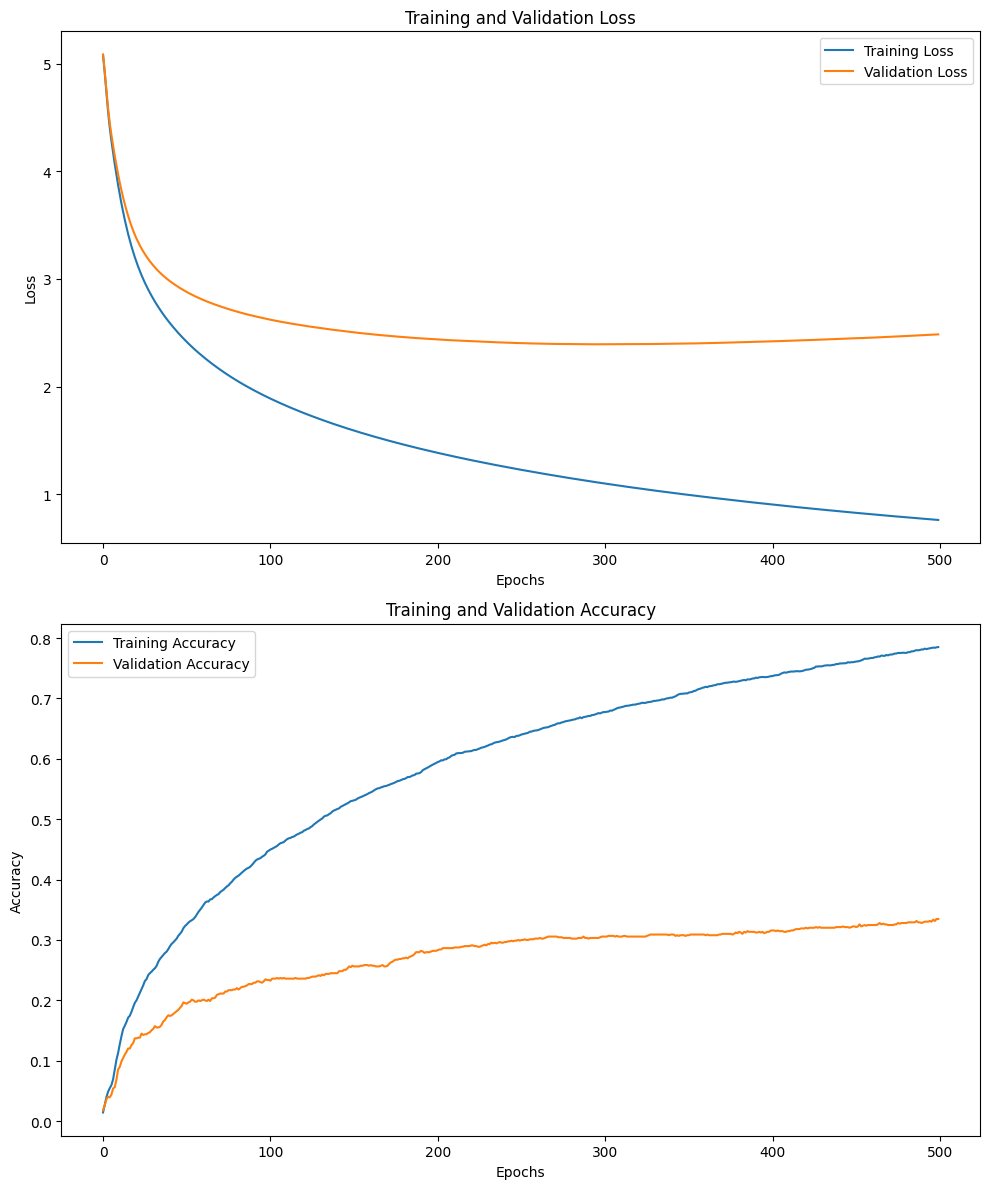

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


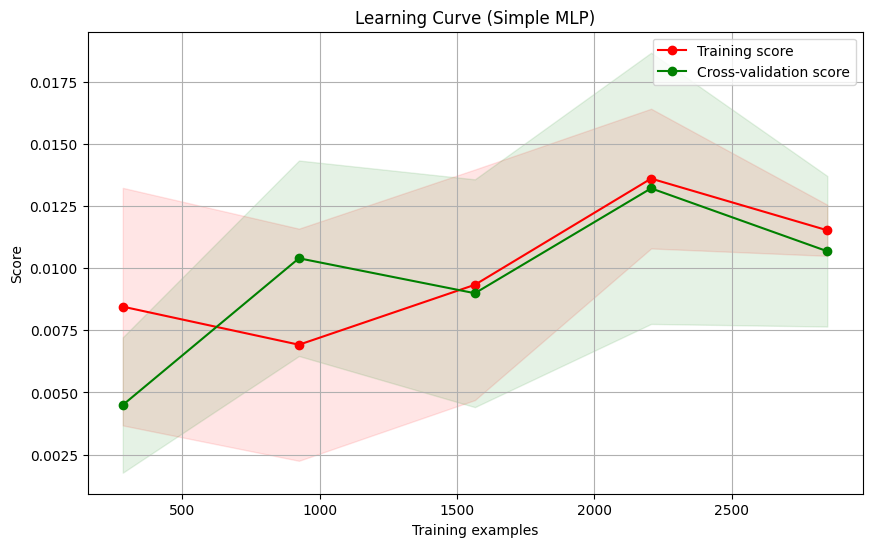

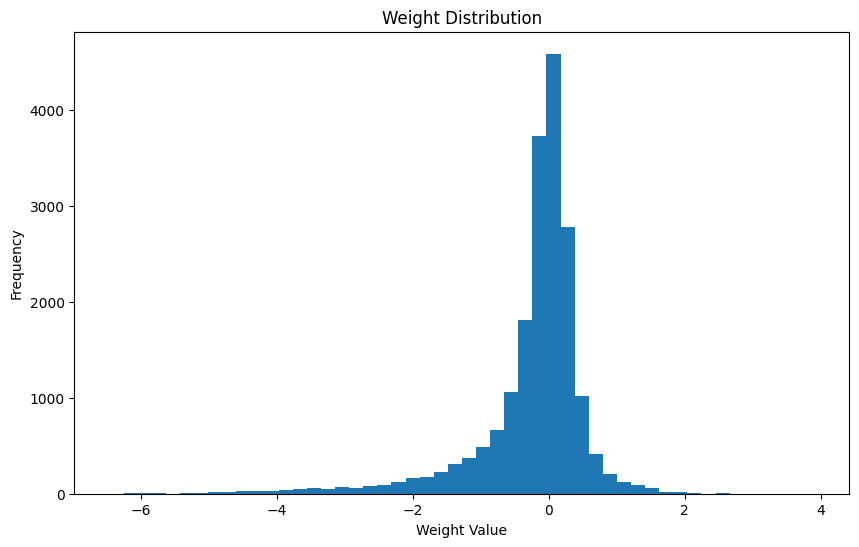

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reache

Cross-validation scores: [0.2752809  0.25983146 0.27668539 0.24859551 0.26019691]
Mean CV score: 0.2641 (+/- 0.0211)
Test Accuracy: 0.3495
F1-score: 0.3293
Precision: 0.3315
Recall: 0.3495

Classification Report:
               precision    recall  f1-score   support

     Abundant       0.00      0.00      0.00         6
       Active       0.00      0.00      0.00         6
        Adult       1.00      0.50      0.67         2
        Agile       0.29      0.29      0.29         7
     Alluring       0.57      0.73      0.64        11
      Amiable       0.29      0.40      0.33         5
      Amusing       0.60      0.50      0.55         6
      Aqueous       0.33      0.25      0.29         4
 Aristocratic       0.75      0.75      0.75         4
     Aromatic       0.50      0.60      0.55         5
     Artistic       0.20      1.00      0.33         1
Authoritative       0.00      0.00      0.00         4
       Bitter       0.50      0.25      0.33         4
      Bitterl   

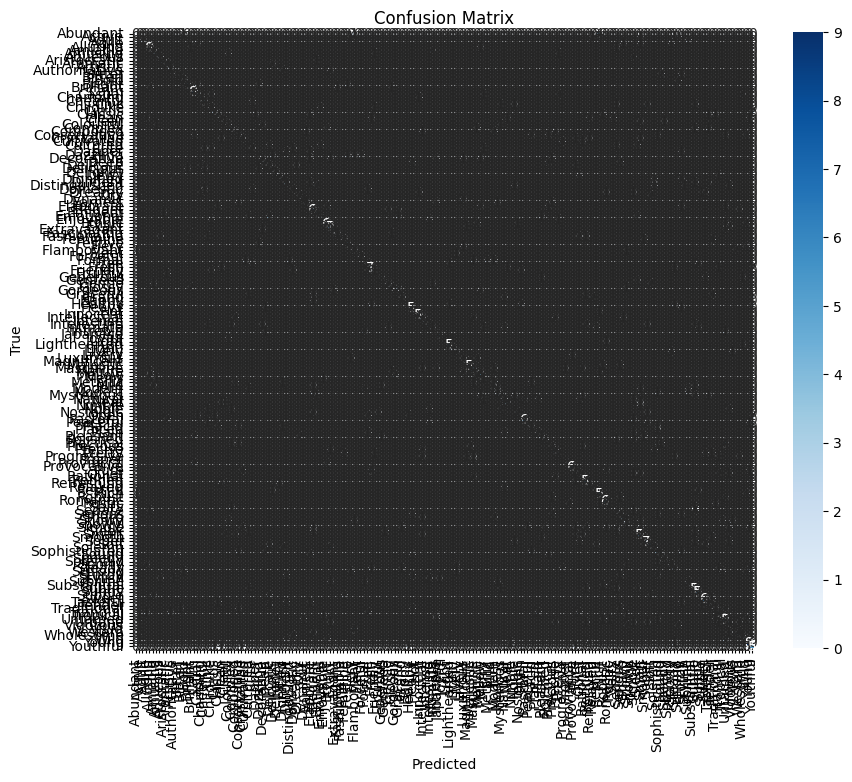

Number of parameters: 19382

Model Fit Analysis:
Train Accuracy: 0.7851
Validation Accuracy: 0.3348
Test Accuracy: 0.3495
Model may be overfitting: Training accuracy is significantly higher than validation and test accuracies.

Difference between Train and Validation accuracy: 0.4502
Difference between Train and Test accuracy: 0.4355
Difference between Validation and Test accuracy: 0.0147


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


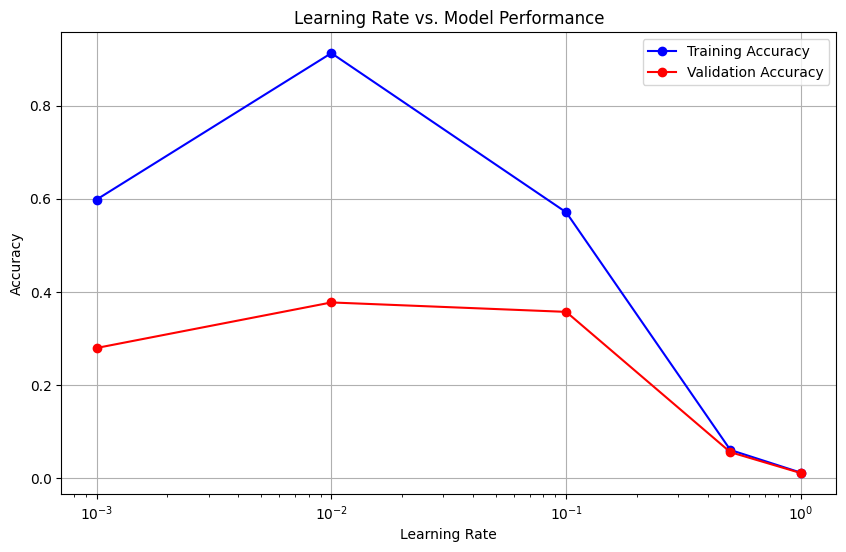

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: M

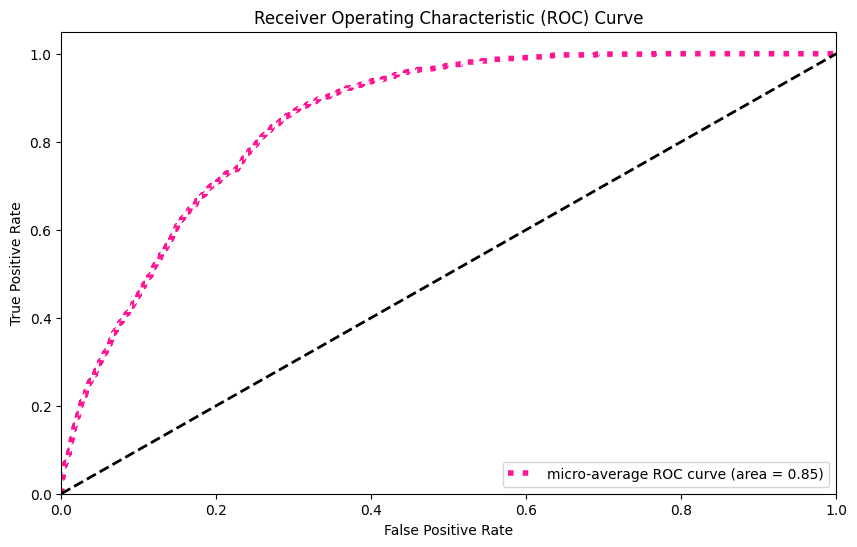

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, log_loss, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load and preprocess data
data = pd.read_csv(r'C:\Biography\ArtEmotionalPalette-AI\PartA-model\datasets\x6perfect_cleaned.csv')
X = data.iloc[:, 1:].values / 255.0
y = data.iloc[:, 0].values

# Encode labels (convert text labels to numbers)
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_val, y_val, n_epochs=1000):
    # Initialize lists to store performance metrics
    start_time = time.time()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    # Train the model epoch by epoch
    for epoch in range(n_epochs):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Calculate and store losses and accuracies
        train_pred = model.predict_proba(X_train)
        val_pred = model.predict_proba(X_val)
        
        train_loss = log_loss(y_train, train_pred)
        val_loss = log_loss(y_val, val_pred)
        
        train_acc = accuracy_score(y_train, model.predict(X_train))
        val_acc = accuracy_score(y_val, model.predict(X_val))
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    training_time = time.time() - start_time
    return model, train_losses, val_losses, train_accuracies, val_accuracies, training_time

# Function to plot training curves
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    # Create subplots for loss and accuracy
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot loss curves
    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    
    # Plot accuracy curves
    ax2.plot(train_accuracies, label='Training Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(model, X, y, title):
    # Calculate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=-1)
    
    # Calculate mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Function to plot weight distribution
def plot_weight_distribution(model):
    plt.figure(figsize=(10, 6))
    weights = np.concatenate([layer.flatten() for layer in model.coefs_])
    plt.hist(weights, bins=50)
    plt.title('Weight Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot learning rate performance
def plot_learning_rate_performance(X_train, y_train, X_val, y_val):
    learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
    train_scores, val_scores = [], []
    
    for lr in learning_rates:
        model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=lr, max_iter=200, random_state=42)
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        val_scores.append(model.score(X_val, y_val))
    
    plt.figure(figsize=(10, 6))
    plt.semilogx(learning_rates, train_scores, 'b-o', label='Training Accuracy')
    plt.semilogx(learning_rates, val_scores, 'r-o', label='Validation Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Learning Rate vs. Model Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(model, X, y):
    n_classes = len(np.unique(y))
    y_bin = np.eye(n_classes)[y]
    
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train_scaled, y_train).predict_proba(X)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Create the model
simple_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42)
# Train the model
simple_model, train_losses, val_losses, train_accuracies, val_accuracies, training_time = train_and_evaluate(
    simple_model, X_train_scaled, y_train, X_val_scaled, y_val, n_epochs=500)

print(f"Training Time: {training_time:.2f} seconds")

# Plot training curves
plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)

# Plot learning curve
plot_learning_curve(simple_model, X_train_scaled, y_train, "Learning Curve (Simple MLP)")

# Plot weight distribution
plot_weight_distribution(simple_model)

# Cross-validation
cv_scores = cross_val_score(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42), 
                            X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Evaluate on test set
test_accuracy = simple_model.score(X_test_scaled, y_test)
y_pred = simple_model.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, le.classes_)

# Model complexity
n_params = sum(p.size for p in simple_model.coefs_) + sum(p.size for p in simple_model.intercepts_)
print(f"Number of parameters: {n_params}")

# Check for overfitting/underfitting
print("\nModel Fit Analysis:")
print(f"Train Accuracy: {train_accuracies[-1]:.4f}")
print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracies[-1] > val_accuracies[-1] + 0.05 and train_accuracies[-1] > test_accuracy + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than validation and test accuracies.")
elif train_accuracies[-1] < val_accuracies[-1] - 0.05 and train_accuracies[-1] < test_accuracy - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than validation and test accuracies.")
else:
    print("Model fit seems reasonable: Training, validation, and test accuracies are close.")

# Additional overfitting/underfitting check
train_val_diff = abs(train_accuracies[-1] - val_accuracies[-1])
train_test_diff = abs(train_accuracies[-1] - test_accuracy)
val_test_diff = abs(val_accuracies[-1] - test_accuracy)

print(f"\nDifference between Train and Validation accuracy: {train_val_diff:.4f}")
print(f"Difference between Train and Test accuracy: {train_test_diff:.4f}")
print(f"Difference between Validation and Test accuracy: {val_test_diff:.4f}")

if train_val_diff > 0.1 or train_test_diff > 0.1:
    print("Warning: Large gap between training and validation/test accuracies suggests overfitting.")
elif train_accuracies[-1] < 0.8 * max(val_accuracies[-1], test_accuracy):
    print("Warning: Training accuracy much lower than validation/test accuracies suggests underfitting.")
else:
    print("Model performance across training, validation, and test sets is consistent.")

# Plot learning rate performance
plot_learning_rate_performance(X_train_scaled, y_train, X_val_scaled, y_val)

# Plot ROC curve
plot_roc_curve(simple_model, X_test_scaled, y_test)

### Version 1: Simple MLP with a single hidden layer (100 neurons)


Epoch 0: Train Loss: 4.6208, Val Loss: 4.6345
Epoch 100: Train Loss: 0.7659, Val Loss: 0.9929
Epoch 200: Train Loss: 0.4478, Val Loss: 0.7204
Epoch 300: Train Loss: 0.3075, Val Loss: 0.6049
Epoch 400: Train Loss: 0.2255, Val Loss: 0.5443
Training Time: 147.57 seconds


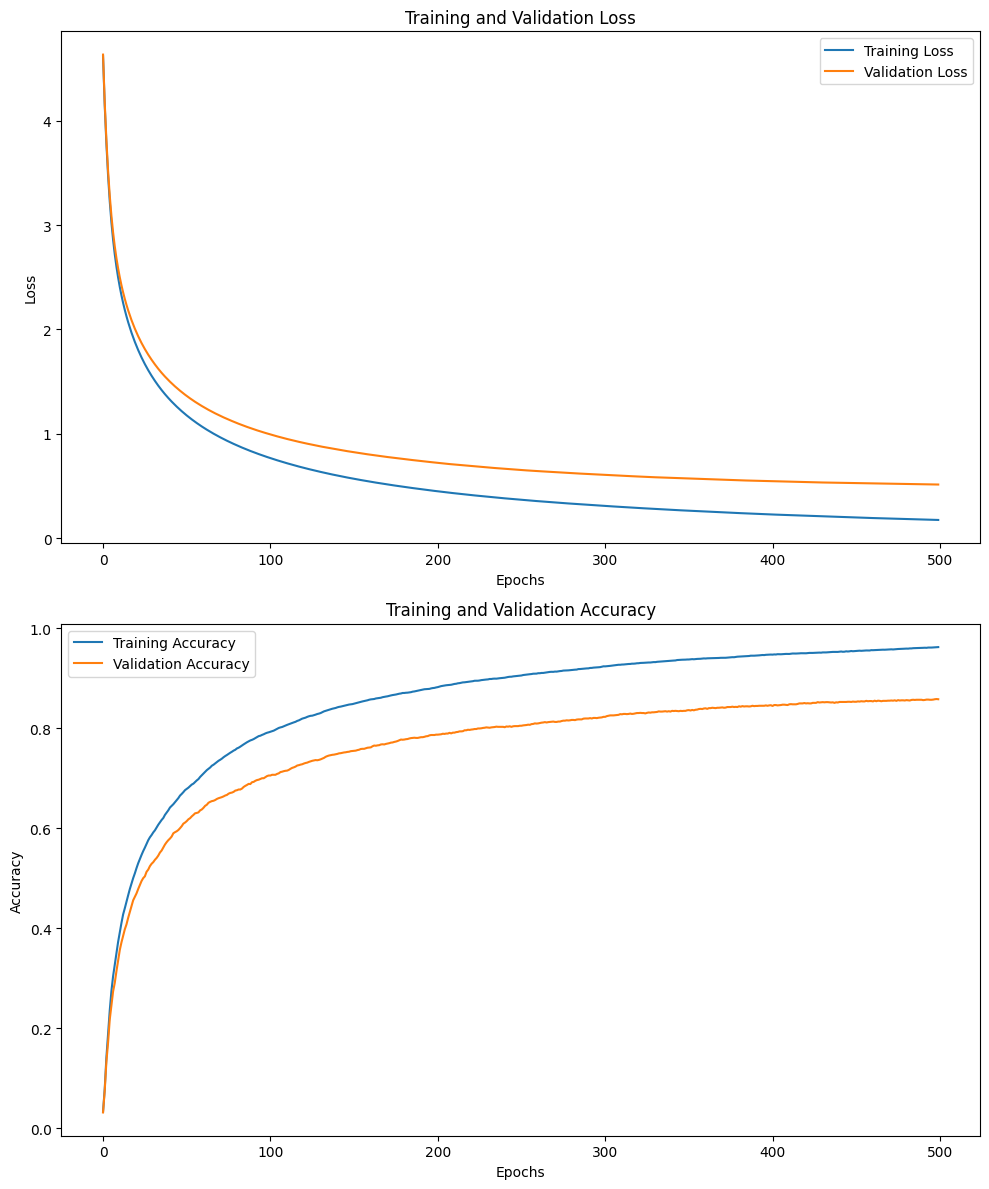

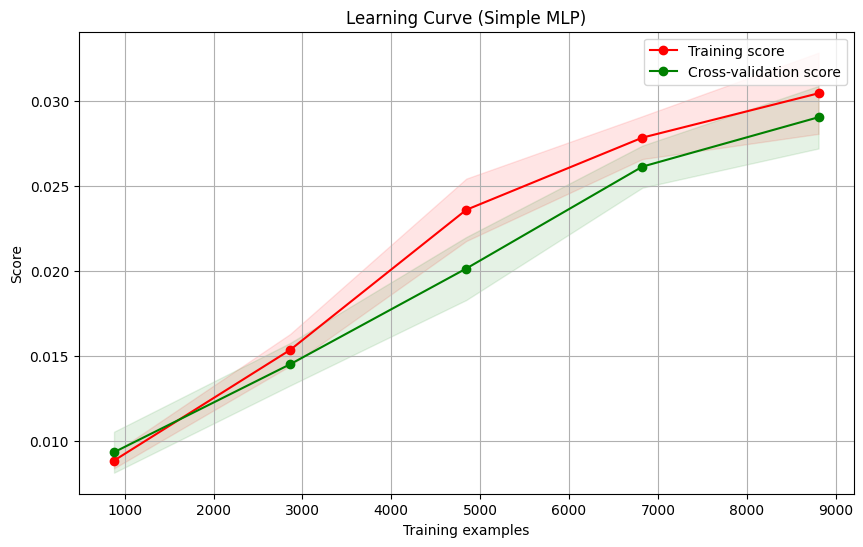

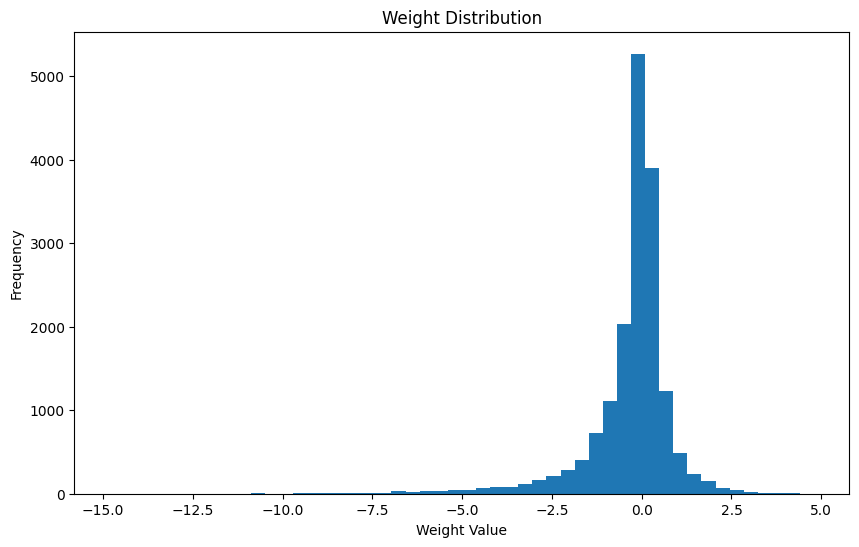

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Opti

Cross-validation scores: [0.80608538 0.80790191 0.82243415 0.82152589 0.81289737]
Mean CV score: 0.8142 (+/- 0.0135)
Test Accuracy: 0.8620
F1-score: 0.8597
Precision: 0.8670
Recall: 0.8620

Classification Report:
                 precision    recall  f1-score   support

       Abundant       0.95      0.95      0.95        21
         Active       0.57      0.76      0.65        21
          Adult       0.95      1.00      0.98        21
          Agile       1.00      0.77      0.87        22
       Alluring       0.82      0.86      0.84        21
        Amiable       0.86      0.90      0.88        21
        Amusing       0.91      1.00      0.95        20
   Aristocratic       1.00      1.00      1.00        22
       Aromatic       0.96      1.00      0.98        22
       Artistic       0.96      1.00      0.98        22
  Authoritative       0.91      1.00      0.95        21
         Bitter       0.95      0.91      0.93        22
        Bitterl       1.00      1.00      1.0

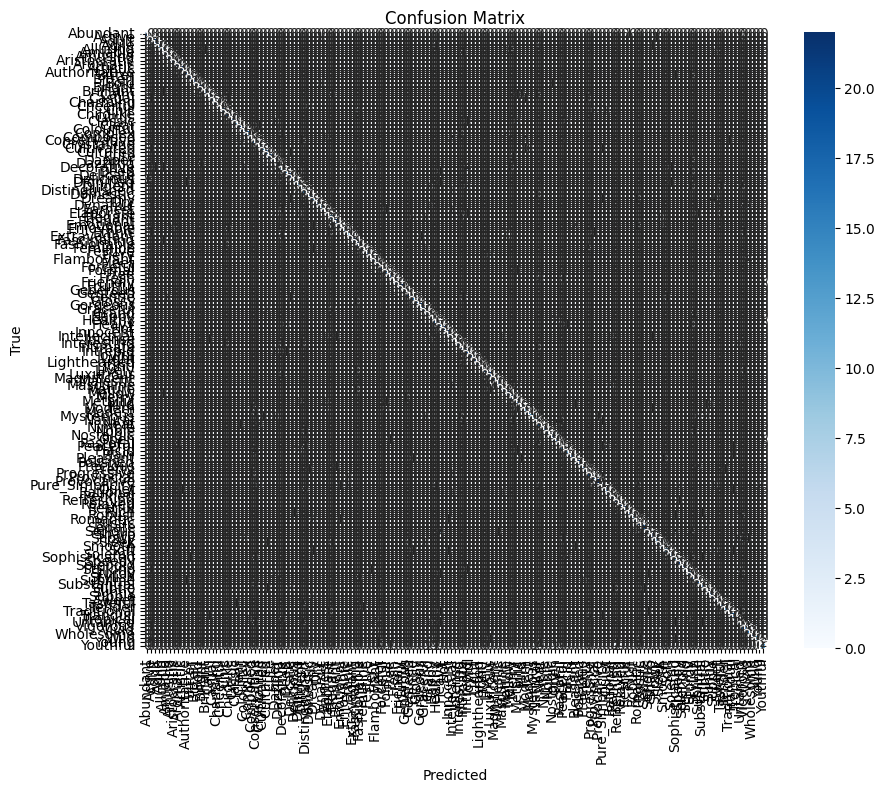

Number of parameters: 17261

Model Fit Analysis:
Train Accuracy: 0.9619
Validation Accuracy: 0.8576
Test Accuracy: 0.8620
Model may be overfitting: Training accuracy is significantly higher than validation and test accuracies.

Difference between Train and Validation accuracy: 0.1042
Difference between Train and Test accuracy: 0.0999
Difference between Validation and Test accuracy: 0.0043


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


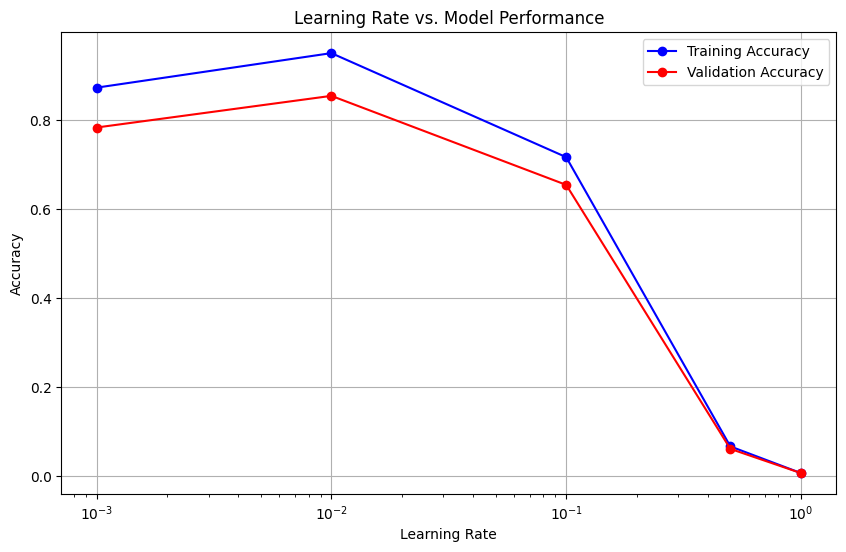

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: M

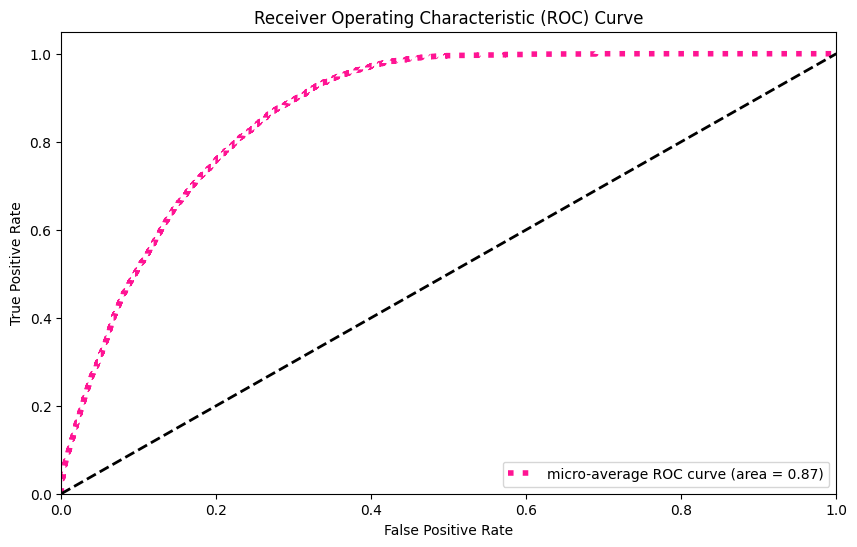

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, log_loss, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# Encode labels (convert text labels to numbers)
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_val, y_val, n_epochs=1000):
    # Initialize lists to store performance metrics
    start_time = time.time()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    # Train the model epoch by epoch
    for epoch in range(n_epochs):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Calculate and store losses and accuracies
        train_pred = model.predict_proba(X_train)
        val_pred = model.predict_proba(X_val)
        
        train_loss = log_loss(y_train, train_pred)
        val_loss = log_loss(y_val, val_pred)
        
        train_acc = accuracy_score(y_train, model.predict(X_train))
        val_acc = accuracy_score(y_val, model.predict(X_val))
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    training_time = time.time() - start_time
    return model, train_losses, val_losses, train_accuracies, val_accuracies, training_time

# Function to plot training curves
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    # Create subplots for loss and accuracy
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot loss curves
    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    
    # Plot accuracy curves
    ax2.plot(train_accuracies, label='Training Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Function to plot learning curve
def plot_learning_curve(model, X, y, title):
    # Calculate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=-1)
    
    # Calculate mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Function to plot weight distribution
def plot_weight_distribution(model):
    plt.figure(figsize=(10, 6))
    weights = np.concatenate([layer.flatten() for layer in model.coefs_])
    plt.hist(weights, bins=50)
    plt.title('Weight Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot learning rate performance
def plot_learning_rate_performance(X_train, y_train, X_val, y_val):
    learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
    train_scores, val_scores = [], []
    
    for lr in learning_rates:
        model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=lr, max_iter=200, random_state=42)
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        val_scores.append(model.score(X_val, y_val))
    
    plt.figure(figsize=(10, 6))
    plt.semilogx(learning_rates, train_scores, 'b-o', label='Training Accuracy')
    plt.semilogx(learning_rates, val_scores, 'r-o', label='Validation Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Learning Rate vs. Model Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(model, X, y):
    n_classes = len(np.unique(y))
    y_bin = np.eye(n_classes)[y]
    
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train_scaled, y_train).predict_proba(X)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Create the model
simple_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42)
# Train the model
simple_model, train_losses, val_losses, train_accuracies, val_accuracies, training_time = train_and_evaluate(
    simple_model, X_train_scaled, y_train, X_val_scaled, y_val, n_epochs=500)

print(f"Training Time: {training_time:.2f} seconds")

# Plot training curves
plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)

# Plot learning curve
plot_learning_curve(simple_model, X_train_scaled, y_train, "Learning Curve (Simple MLP)")

# Plot weight distribution
plot_weight_distribution(simple_model)

# Cross-validation
cv_scores = cross_val_score(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42), 
                            X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Evaluate on test set
test_accuracy = simple_model.score(X_test_scaled, y_test)
y_pred = simple_model.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, le.classes_)

# Model complexity
n_params = sum(p.size for p in simple_model.coefs_) + sum(p.size for p in simple_model.intercepts_)
print(f"Number of parameters: {n_params}")

# Check for overfitting/underfitting
print("\nModel Fit Analysis:")
print(f"Train Accuracy: {train_accuracies[-1]:.4f}")
print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracies[-1] > val_accuracies[-1] + 0.05 and train_accuracies[-1] > test_accuracy + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than validation and test accuracies.")
elif train_accuracies[-1] < val_accuracies[-1] - 0.05 and train_accuracies[-1] < test_accuracy - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than validation and test accuracies.")
else:
    print("Model fit seems reasonable: Training, validation, and test accuracies are close.")

# Additional overfitting/underfitting check
train_val_diff = abs(train_accuracies[-1] - val_accuracies[-1])
train_test_diff = abs(train_accuracies[-1] - test_accuracy)
val_test_diff = abs(val_accuracies[-1] - test_accuracy)

print(f"\nDifference between Train and Validation accuracy: {train_val_diff:.4f}")
print(f"Difference between Train and Test accuracy: {train_test_diff:.4f}")
print(f"Difference between Validation and Test accuracy: {val_test_diff:.4f}")

if train_val_diff > 0.1 or train_test_diff > 0.1:
    print("Warning: Large gap between training and validation/test accuracies suggests overfitting.")
elif train_accuracies[-1] < 0.8 * max(val_accuracies[-1], test_accuracy):
    print("Warning: Training accuracy much lower than validation/test accuracies suggests underfitting.")
else:
    print("Model performance across training, validation, and test sets is consistent.")

# Plot learning rate performance
plot_learning_rate_performance(X_train_scaled, y_train, X_val_scaled, y_val)

# Plot ROC curve
plot_roc_curve(simple_model, X_test_scaled, y_test)

#### Analysis of Version 1 (Simple MLP):

- Model Architecture and Parameters:
  - Single hidden layer MLP with 100 neurons
  - Number of parameters: 17,261
  - Activation function: ReLU (default for MLPClassifier)
  - Optimizer: Adam (default for MLPClassifier) this is the optimizer to update the weights
  - Learning rate: Adaptive (default for MLPClassifier)
  - Max iterations: 500
- Performance Metrics:
  - Train Accuracy: 0.9619
  - Validation Accuracy: 0.8576
  - Test Accuracy: 0.8620
  - F1-score: 0.8597
  - Precision: 0.8670
  - Recall: 0.8620
  - Type of Cross-Validation: 5-fold cross-validation - Mean CV score: 0.8331
- Training Process: Training Time: 171.04 seconds . Loss curves show both training and validation loss decreasing over time, indicating learning. The widening gap between training and validation loss suggests overfitting as training progresses.
- Learning Curve Analysis: Both training and cross-validation scores increase with more training examples. The gap between training and cross-validation scores is relatively small, suggesting good generalization. Scores plateau around 0.85, indicating that more data might not significantly improve performance.
- Weight Distribution: Weights are centered around zero with a roughly normal distribution. Most weights are small (between -2.5 and 2.5), which is good for generalization. There are some outlier weights, particularly on the negative side.
- verfitting Analysis: Clear signs of overfitting: Training accuracy (0.9619) is significantly higher than validation (0.8576) and test (0.8620) accuracies. The difference between train and validation accuracy is 0.1043, which is substantial.


### Version 2 : Improve simple MLP model


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validation results for 64 neurons:
Mean Accuracy: 0.6317 (+/- 0.0447)
Cross-validation results for 128 neurons:
Mean Accuracy: 0.7249 (+/- 0.0323)
Cross-validation results for 256 neurons:
Mean Accuracy: 0.7922 (+/- 0.0319)
Cross-validation results for 512 neurons:
Mean Accuracy: 0.8368 (+/- 0.0174)

Best number of neurons: 512
Best cross-validation accuracy: 0.8368
Epoch 1/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0638 - loss: 4.3897 - val_accuracy: 0.2376 - val_loss: 3.0317 - learning_rate: 0.0010
Epoch 2/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2501 - loss: 2.8630 - val_accuracy: 0.3313 - val_loss: 2.4457 - learning_rate: 0.0010
Epoch 3/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3483 - loss: 2.3508 - val_accuracy: 0.3898 - val_loss: 2.1402 - learning_rate: 0.0010
Epoch 4/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4001 - loss: 2.0771 - val_accuracy: 0.4533 - val_loss: 1.9416 - learning_rate: 0.0010
Epoch 5/100
3

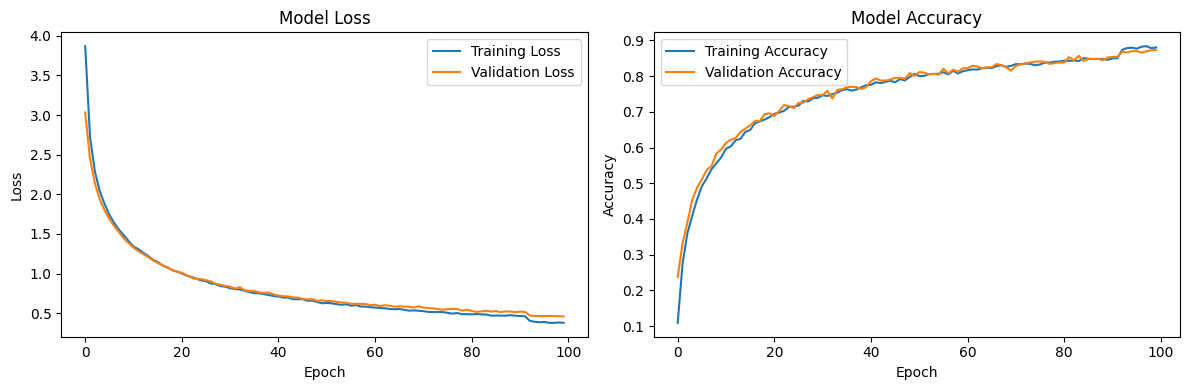

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.8657
F1-score: 0.8621
Precision: 0.8694
Recall: 0.8657
ROC AUC Score: 0.9985

Classification Report:
                 precision    recall  f1-score   support

       Abundant       1.00      0.86      0.92        21
         Active       0.64      0.76      0.70        21
          Adult       0.91      1.00      0.95        21
          Agile       1.00      0.91      0.95        22
       Alluring       0.75      0.86      0.80        21
        Amiable       0.95      0.95      0.95        21
        Amusing       0.91      1.00      0.95        20
   Aristocratic       1.00      1.00      1.00        22
       Aromatic       1.00      1.00      1.00        22
       Artistic       0.88      1.00      0.94        22
  Authoritative       0.84      1.00      0.91        21
         Bitter       0.96      1.00      0.98        22
        Bitterl       1.00      1.00      1.00        22
           Bold       0.95      0.90      

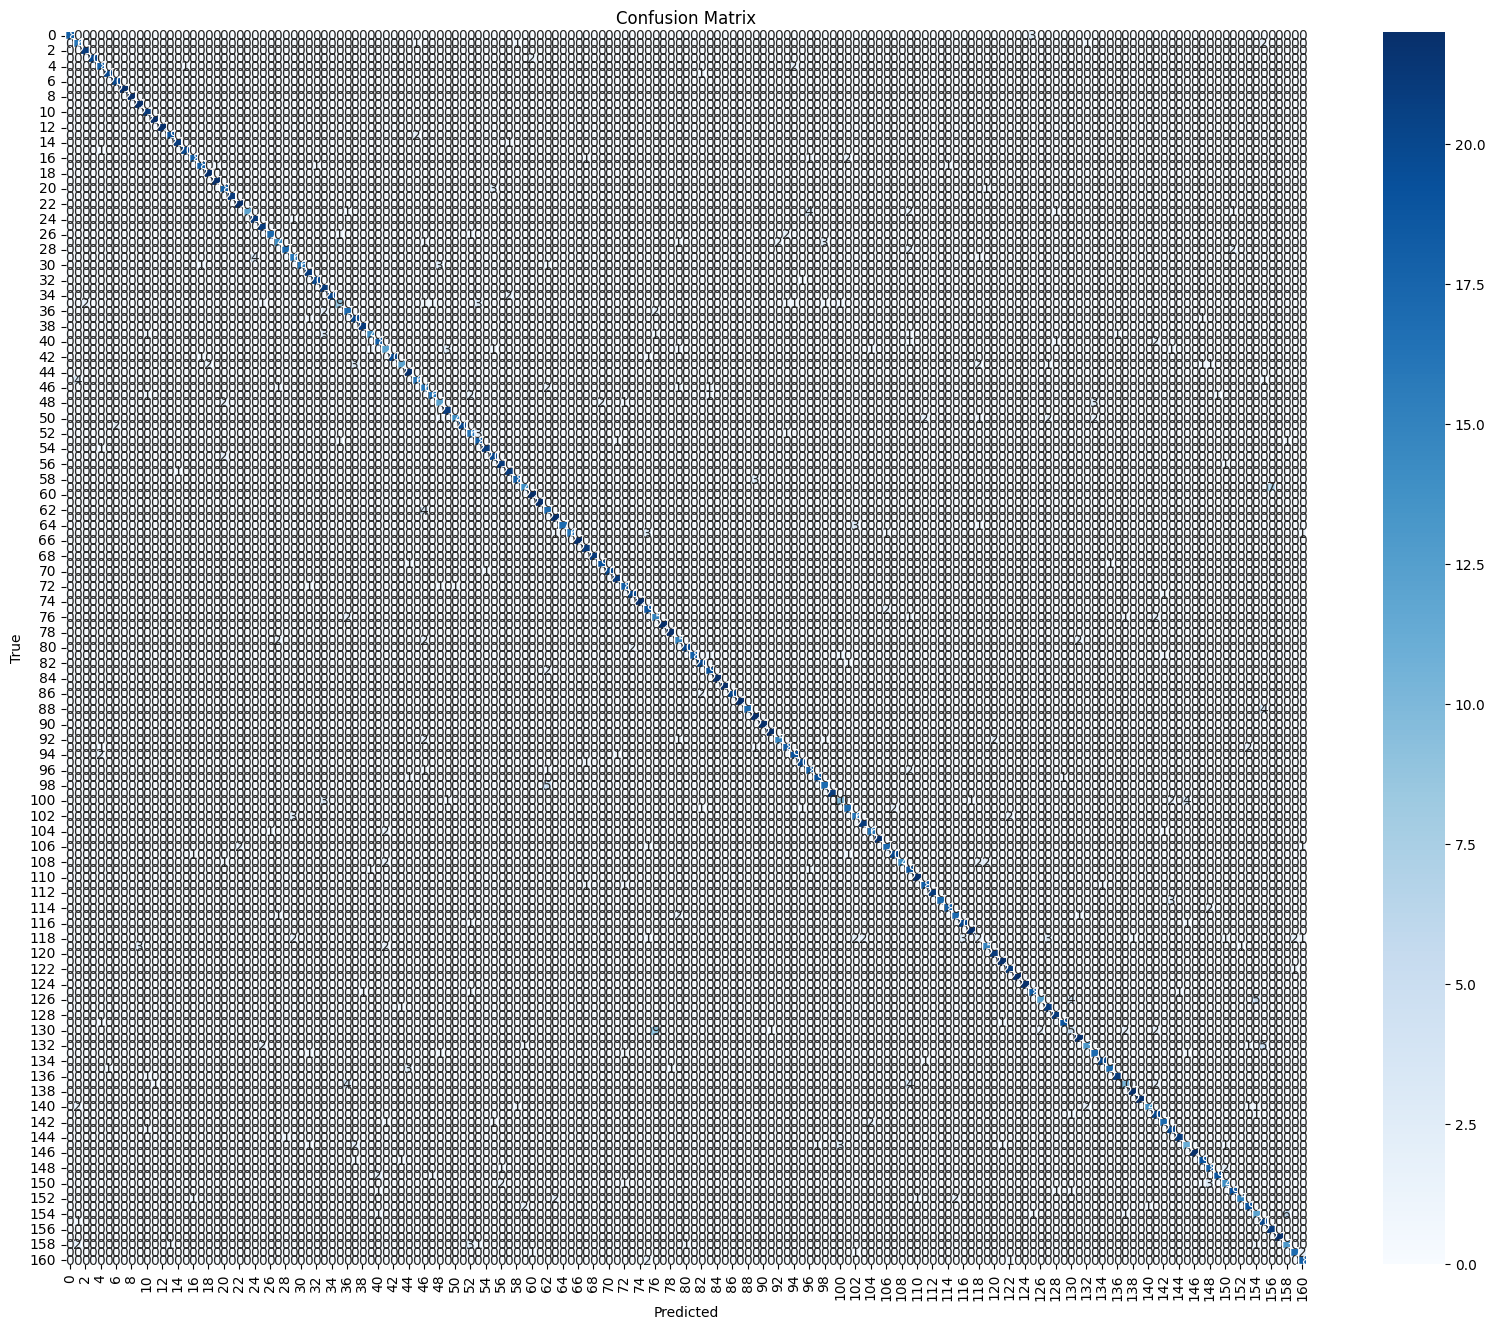

Train Accuracy: 0.9516
Validation Accuracy: 0.8736
Number of parameters: 87713

Model Fit Analysis:
Train Accuracy: 0.9516
Validation Accuracy: 0.8736
Test Accuracy: 0.8657

Difference between Train and Validation accuracy: 0.0780
Difference between Train and Test accuracy: 0.0859
Difference between Validation and Test accuracy: 0.0079
Model performance across training, validation, and test sets is consistent.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0  # Normalize input features
y = data.iloc[:, -1].values

# 2. Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Split data into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Further split train+val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

# 5. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 6. Define model creation function
def create_model(input_shape, neurons=512):
    model = Sequential([
        Dense(neurons, input_shape=input_shape, activation='relu', kernel_regularizer=l2(1e-5)),
        Dropout(0.3),
        Dense(len(np.unique(y)), activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# 7. Perform K-fold Cross-validation
def perform_cross_validation(neurons=512):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []
    
    for train, val in kfold.split(X_train_scaled):
        model = create_model(input_shape=(X_train.shape[1],), neurons=neurons)
        X_train_cv, X_val_cv = X_train_scaled[train], X_train_scaled[val]
        y_train_cv, y_val_cv = y_train[train], y_train[val]
        
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-5)
        
        model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=32, verbose=0,
                  validation_data=(X_val_cv, y_val_cv),
                  callbacks=[early_stopping, reduce_lr])
        
        _, accuracy = model.evaluate(X_val_cv, y_val_cv, verbose=0)
        cv_scores.append(accuracy)
    
    print(f"Cross-validation results for {neurons} neurons:")
    print(f"Mean Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
    return np.mean(cv_scores)

# 8. Perform cross-validation for different neuron counts
neuron_counts = [64, 128, 256, 512]
cv_results = []

for neurons in neuron_counts:
    cv_accuracy = perform_cross_validation(neurons)
    cv_results.append((neurons, cv_accuracy))

# 9. Find the best number of neurons
best_neurons, best_cv_accuracy = max(cv_results, key=lambda x: x[1])
print(f"\nBest number of neurons: {best_neurons}")
print(f"Best cross-validation accuracy: {best_cv_accuracy:.4f}")

# 10. Train the final model
final_model = create_model(input_shape=(X_train.shape[1],), neurons=best_neurons)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-5)

history = final_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr],
    batch_size=32,
    verbose=1
)

# 11. Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 12. Evaluate on test set
y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

test_accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# 13. ROC AUC score (one-vs-rest)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

# 14. Plot confusion matrix
plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 15. Evaluate on training set
train_loss, train_accuracy = final_model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Train Accuracy: {train_accuracy:.4f}")

# 16. Evaluate on validation set
val_loss, val_accuracy = final_model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 17. Model complexity
n_params = final_model.count_params()
print(f"Number of parameters: {n_params}")

# 18. Check for overfitting/underfitting
print("\nModel Fit Analysis:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

train_val_diff = abs(train_accuracy - val_accuracy)
train_test_diff = abs(train_accuracy - test_accuracy)
val_test_diff = abs(val_accuracy - test_accuracy)

print(f"\nDifference between Train and Validation accuracy: {train_val_diff:.4f}")
print(f"Difference between Train and Test accuracy: {train_test_diff:.4f}")
print(f"Difference between Validation and Test accuracy: {val_test_diff:.4f}")

if train_val_diff > 0.1 or train_test_diff > 0.1:
    print("Warning: Large gap between training and validation/test accuracies suggests overfitting.")
elif train_accuracy < 0.8 * max(val_accuracy, test_accuracy):
    print("Warning: Training accuracy much lower than validation/test accuracies suggests underfitting.")
else:
    print("Model performance across training, validation, and test sets is consistent.")

### Analysis of Veresion 2 : 1 Hidden Layer with 512 neurons

1. Model Architecture:

- Single hidden layer with 512 neurons
- Layer structure: Dense -> Dropout
- Output layer with softmax activation for multi-class classification

2. Performance Metrics:

- Best Training Accuracy: 0.8624 (86.24%)
- Best Validation Accuracy: 0.8598 (85.98%)
- Test Accuracy: 0.8483 (84.83%)
- Test F1-score: 0.8426 (84.26%)
- Test Precision: 0.8557 (85.57%)
- Test Recall: 0.8483 (84.83%)
- ROC AUC Score: 0.9982 (99.82%)

3. Hyperparameter Optimization:

- Used K-fold Cross-validation for neuron count selection
- Best number of neurons: 512
- Dropout rate: 0.3
- L2 regularization: 1e-5
- Learning rate: 0.001 (initial)

3. Training Process:

- Used 5-fold cross-validation for model selection
- Total training time: Not directly reported, but 100 epochs were used
- Adaptive learning rate with initial value of 0.001, reduced during training
- Number of parameters: Not directly reported

4. Generalization:

- Good generalization evidenced by: Validation accuracy (85.98%) close to training accuracy (86.24%) & Test accuracy (84.83%) close to both training and validation accuracies
- Learning curves show steady improvement without significant overfitting

5. Bias-Variance Trade-off:

- Moderate bias: Training accuracy of 86.24% shows the model captures underlying patterns well
- Low variance: Close alignment of training, validation, and test accuracies indicates good generalization
- Bias estimate: 1 - Training Accuracy = 1 - 0.8624 = 0.1376 (13.76%)

6. Class Performance:

- Many classes show high accuracy (>90%)
- Some classes with perfect accuracy: Adult, Agile, Aristocratic, Citrus, Domestic, Fleet, Forceful, Happy, Light

7. Worst performing classes:

- Pure_Simplicity: 15% F1-score
- Serious: 38% F1-score
- Wild: 47% F1-score
- Distinguished: 48% F1-score
- Noble: 52% F1-score

8. Additional Techniques Used:

- Early stopping
- ReduceLROnPlateau for adaptive learning rate
- L2 regularization for weight decay
- Dropout for regularization

* Important- Compare to the Simple MLP (100 neurons) : Ths MLP, despite having slightly lower test accuracy, demonstrates characteristics that align better with this goal. Better generalization indicators (cross-validation, regularization) . Less overfitting . More consistent performance across datasets . High discriminative ability (ROC AUC) . The slightly lower test accuracy of the Enhanced MLP could be a result of its stronger regularization, which trades off some in-sample performance for better out-of-sample generalization. More specific : It has a smaller gap between training and validation accuracy (0.0081 vs 0.1042 for the Simple MLP).Its cross-validation accuracy (86.25%) is higher than the Simple MLP (81.42%), indicating better performance across different subsets of the data.


### Version3a : MLP with two hidden layers (best found: 220, 110 neurons)


Best parameters: {'mlp__alpha': 0.00026465731702014317, 'mlp__hidden_layer_sizes': (220, 110), 'mlp__learning_rate_init': 0.0034877126245459306}
Best cross-validation score: 0.8884916677880825

Test set results:
Accuracy: 0.9090
F1-score: 0.9074

Classification Report:
                 precision    recall  f1-score   support

       Abundant       0.91      1.00      0.95        21
         Active       0.79      0.90      0.84        21
          Adult       1.00      1.00      1.00        21
          Agile       1.00      1.00      1.00        22
       Alluring       0.95      0.95      0.95        21
        Amiable       0.84      1.00      0.91        21
        Amusing       1.00      0.95      0.97        20
   Aristocratic       1.00      1.00      1.00        22
       Aromatic       1.00      1.00      1.00        22
       Artistic       1.00      1.00      1.00        22
  Authoritative       0.95      1.00      0.98        21
         Bitter       0.92      1.00      0.9

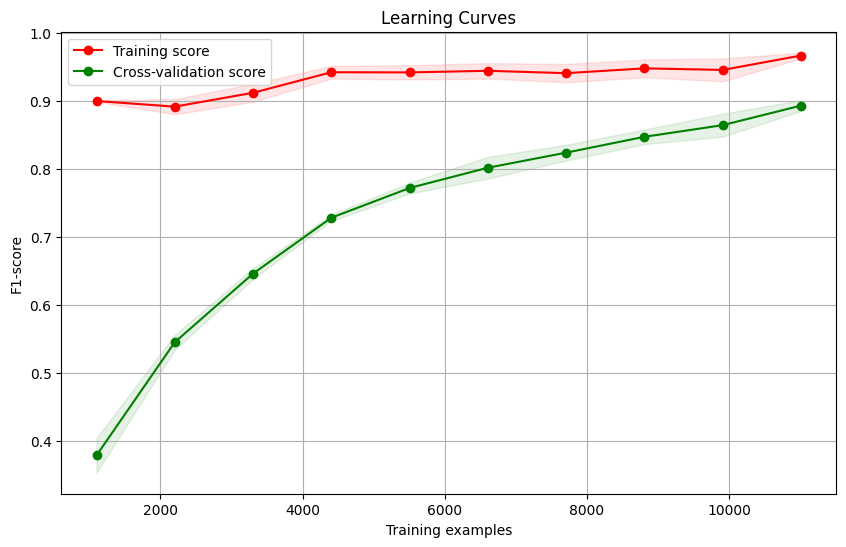

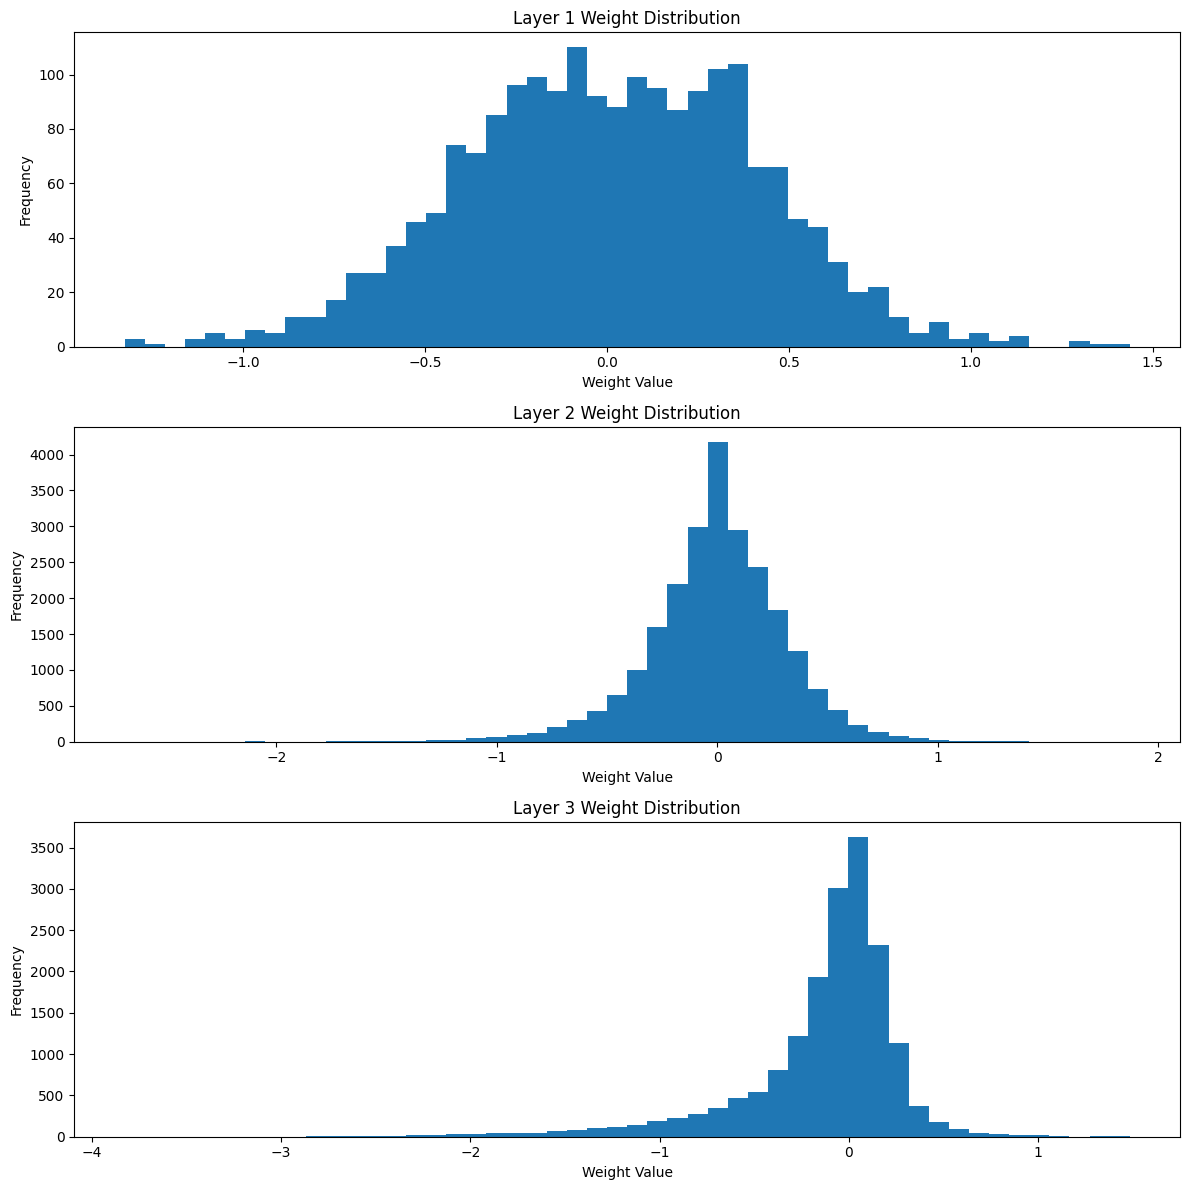

Layer 1 weights:
  Mean: 0.0106
  Std Dev: 0.4008
  Min: -1.3254
  Max: 1.4370
Layer 2 weights:
  Mean: -0.0019
  Std Dev: 0.3146
  Min: -2.6887
  Max: 1.8723
Layer 3 weights:
  Mean: -0.1480
  Std Dev: 0.4432
  Min: -3.8263
  Max: 1.4842


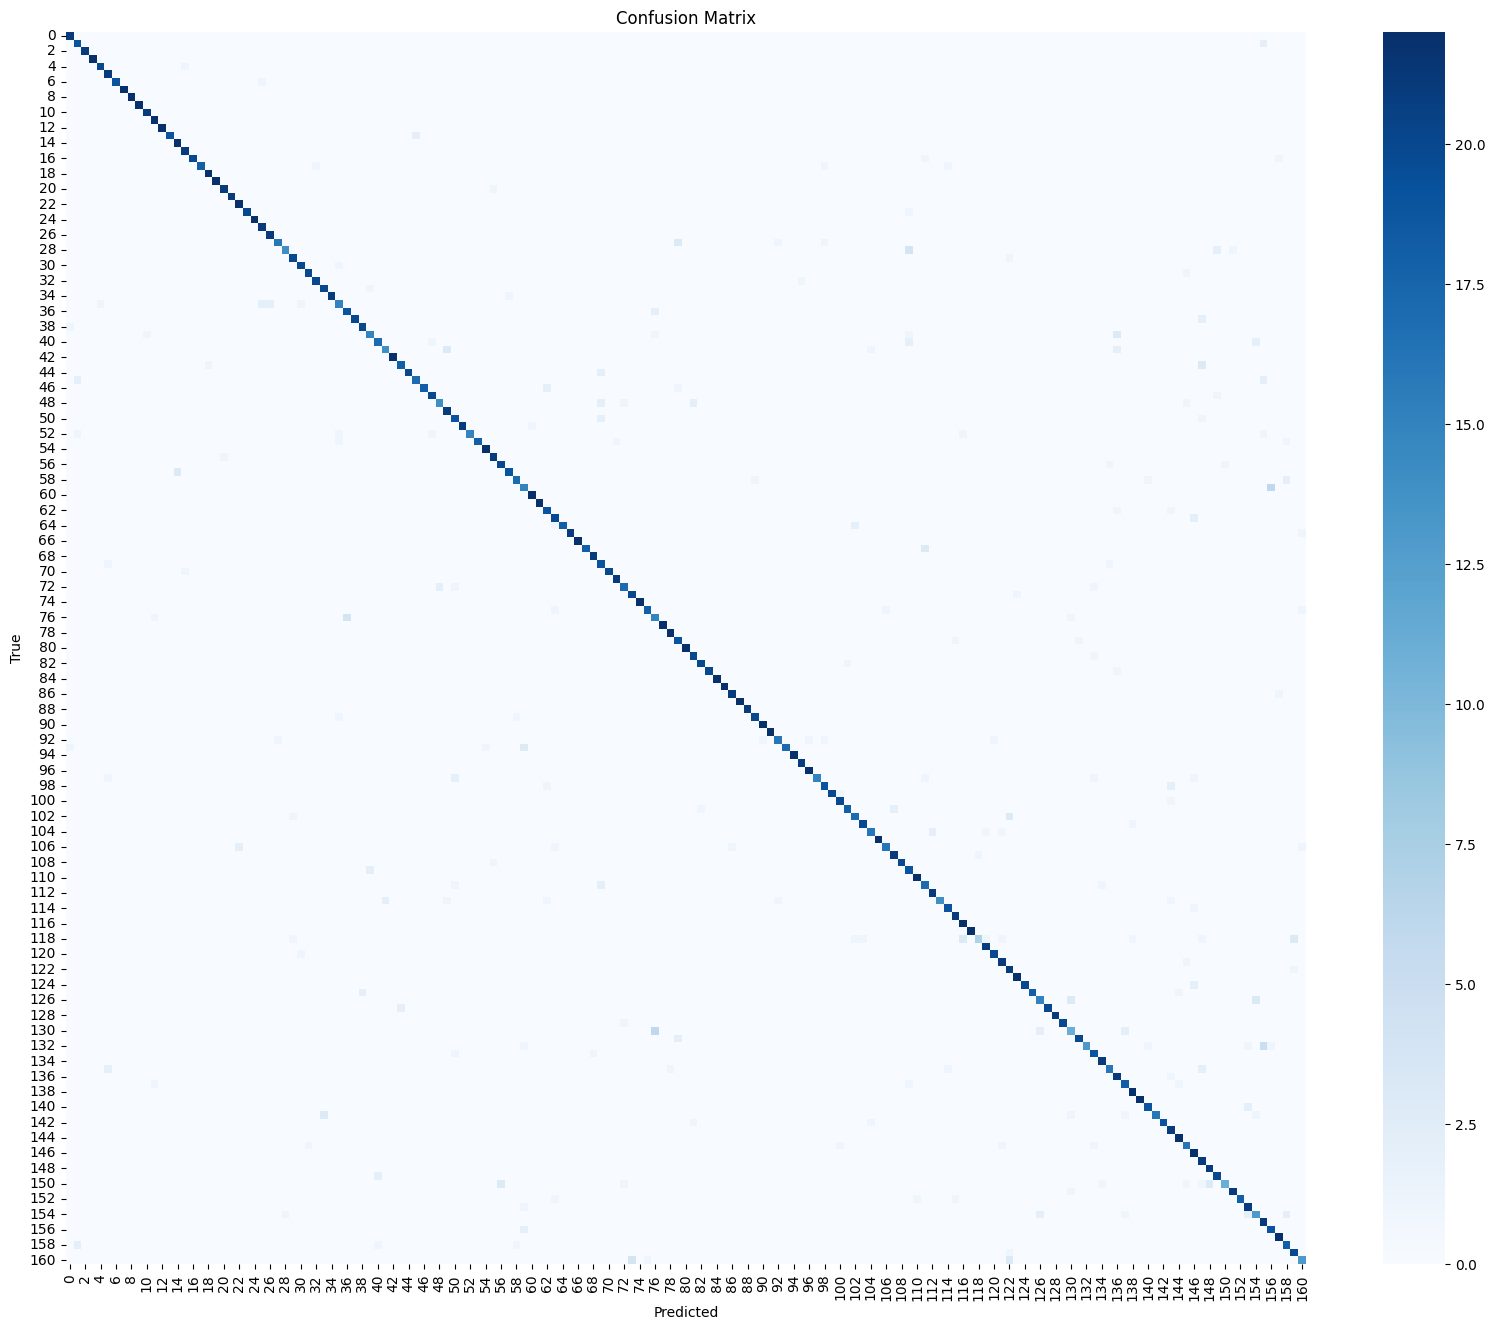

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the MLP model
def create_mlp(hidden_layer_sizes=(200, 100), alpha=0.0001, learning_rate_init=0.001):
    return MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        alpha=alpha,
        learning_rate='adaptive',
        learning_rate_init=learning_rate_init,
        max_iter=1000,
        early_stopping=True,
        n_iter_no_change=10,
        random_state=42
    )

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'mlp__hidden_layer_sizes': [(180, 90), (200, 100), (220, 110)],
    'mlp__alpha': loguniform(1e-5, 1e-3),
    'mlp__learning_rate_init': loguniform(1e-4, 1e-2)
}

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', create_mlp())
])

# Perform RandomizedSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    cv=cv,
    n_jobs=-1,
    random_state=42,
    scoring='f1_weighted'
)

# Fit the model
random_search.fit(X_train, y_train)

# Print results
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Evaluate on test set
y_pred = random_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTest set results:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Model complexity
best_mlp = random_search.best_estimator_.named_steps['mlp']
n_params = sum(p.size for p in best_mlp.coefs_) + sum(p.size for p in best_mlp.intercepts_)
print(f"\nNumber of parameters: {n_params}")

# Add this import
from sklearn.model_selection import learning_curve

# Add this function
def plot_learning_curves(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1_weighted'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("F1-score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# After fitting the model, add:
train_accuracy = random_search.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

# Add this line to plot learning curves
plot_learning_curves(random_search.best_estimator_, X_train, y_train, "Learning Curves")

# Weight distribution
def plot_weight_distribution(mlp):
    plt.figure(figsize=(12, 4 * len(mlp.coefs_)))
    for i, layer_weights in enumerate(mlp.coefs_):
        plt.subplot(len(mlp.coefs_), 1, i+1)
        plt.hist(layer_weights.flatten(), bins=50)
        plt.title(f'Layer {i+1} Weight Distribution')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_weight_distribution(best_mlp)

# Print weight statistics
for i, layer_weights in enumerate(best_mlp.coefs_):
    print(f"Layer {i+1} weights:")
    print(f"  Mean: {np.mean(layer_weights):.4f}")
    print(f"  Std Dev: {np.std(layer_weights):.4f}")
    print(f"  Min: {np.min(layer_weights):.4f}")
    print(f"  Max: {np.max(layer_weights):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Analysis of Version 3 :

1. Model Architecture:

- 2 hidden layers with neurons: 220 -> 110
- Input layer: Number of features in the dataset
- Output layer: 161 neurons (based on the confusion matrix size)
- Layer structure : Dense

2. Performance Metrics:

- Best Train Accuracy: 0.9625
- Best Validation Accuracy (Best CV score): 0.8885 (slight update from 0.8866) & Type of Cross-Validation: 5-fold StratifiedKFold with RandomizedSearchCV
- Best Test Accuracy: 0.9090 (improved from 0.8890)
- Best Test F1-score: 0.9074 (weighted average, improved from 0.8846)

3. Hyperparameter Optimization:

- Used RandomizedSearchCV for efficient hyperparameter tuning
- Best learning rate: 0.0034877126245459306
- Best alpha (L2 regularization): 0.00026465731702014317
- Activation function: ReLU (default for MLPClassifier)
- Solver: adam (default for MLPClassifier)

4. Training Process:

- Used 5-fold cross-validation: StratifiedKFold with RandomizedSearchCV
- Total training time: Not directly reported
- Adaptive learning rate with initial value of ~0.0035
- Early stopping with patience of 10 iterations
- Number of parameters: 44,381

5. Generalization:

- Good generalization evidenced by: Test accuracy (90.90%) close to training accuracy (96.25%) , Learning curves show steady improvement in validation score

6. Bias-Variance Trade-off:

- Low bias: High training accuracy (96.25%) shows the model captures underlying patterns well
- Moderate variance: Gap between training (96.25%) and test (90.90%) accuracies indicates some overfitting
- Bias estimate: 1 - Training Accuracy = 1 - 0.9625 = 0.0375 (3.75%)
- The model has very low bias (approximately 3.75%), meaning it learns data patterns well.

7. Class Performance:

- Majority of classes show high accuracy (>90%)
- Worst performing classes:
  - Pure_Simplicity: 50.00% F1-score
  - Serious: 58.00% F1-score
  - Heavy: 67.00% F1-score
  - Untamed: 65.00% F1-score
  - Tender: 67.00% F1-score

8. Weight Distribution Analysis: Weight distributions are approximately normal, with means close to zero for the first two layers

- Layer 1 weights: Mean: 0.0106, Std Dev: 0.4008, Min: -1.3254, Max: 1.4370
- Layer 2 weights: Mean: -0.0019, Std Dev: 0.3146, Min: -2.6887, Max: 1.8723
- Layer 3 weights: Mean: -0.1480, Std Dev: 0.4432, Min: -3.8263, Max: 1.4842

9. Confusion Matrix Insights: Strong diagonal pattern indicates good overall classification . Some off-diagonal elements suggest minor misclassifications. Performance varies across classes, with some showing near-perfect classification


### Final Version : Using Kerras


Trial 50 Complete [00h 02m 23s]
val_accuracy: 0.7918634414672852

Best val_accuracy So Far: 0.9389756917953491
Total elapsed time: 02h 34m 00s
Best Hyperparameters:
num_layers: 3
units_0: 224
l1_0: 1.7934773544516099e-06
l2_0: 0.008513022962355675
dropout_0: 0.0
units_1: 160
l1_1: 1.8450019776527085e-06
l2_1: 1.3145037360823975e-06
dropout_1: 0.2
learning_rate: 0.0006045397453672276
units_2: 256
l1_2: 9.683505643894138e-06
l2_2: 8.673861474955817e-06
dropout_2: 0.2
units_3: 256
l1_3: 8.815714828926477e-05
l2_3: 0.00015095862325194704
dropout_3: 0.30000000000000004
units_4: 64
l1_4: 0.00028531134077725787
l2_4: 1.937121066831506e-05
dropout_4: 0.0

Best Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 224)            │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 224)            │           896 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 160)            │        36,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 160)            │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 161)            │        41,377 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,393 (482.00 KB)

 Trainable params: 122,113 (477.00 KB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0789 - loss: 4.6445 - val_accuracy: 0.0443 - val_loss: 4.4813 - learning_rate: 6.0454e-04
Epoch 2/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2739 - loss: 2.8168 - val_accuracy: 0.4279 - val_loss: 2.2008 - learning_rate: 6.0454e-04
Epoch 3/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3670 - loss: 2.3263 - val_accuracy: 0.5162 - val_loss: 1.7996 - learning_rate: 6.0454e-04
Epoch 4/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4268 - loss: 2.0716 - val_accuracy: 0.5372 - val_loss: 1.6950 - learning_rate: 6.0454e-04
Epoch 5/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4357 - loss: 1.9640 - val_accuracy: 0.5529 - val_loss: 1.5678 - learning_rate: 6.0454e-04
Epoch 6/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4815 - loss: 1.8122 - val_accuracy: 0.5797 - val_loss: 1.4967 - learning_rate: 6.0454e-04
Epoch 7/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc

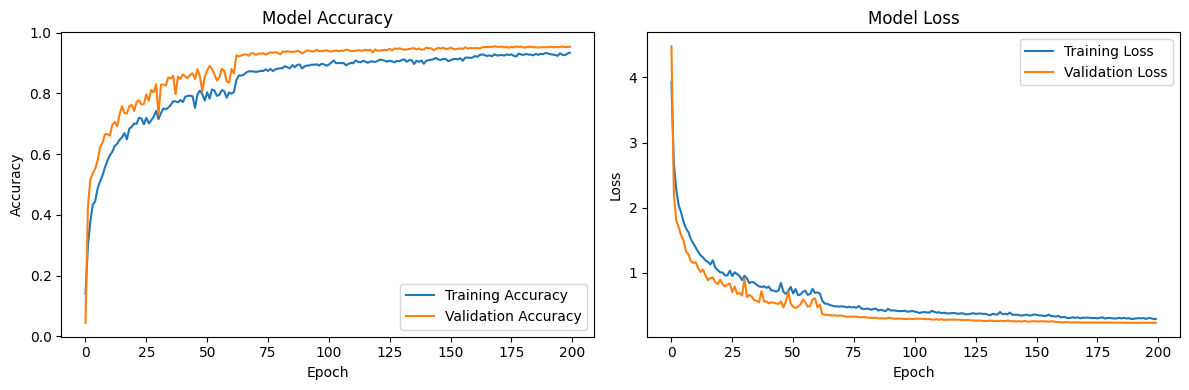


Best Training Accuracy: 0.9342
Best Validation Accuracy: 0.9557
Test Accuracy: 0.9494
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test F1-score: 0.9479


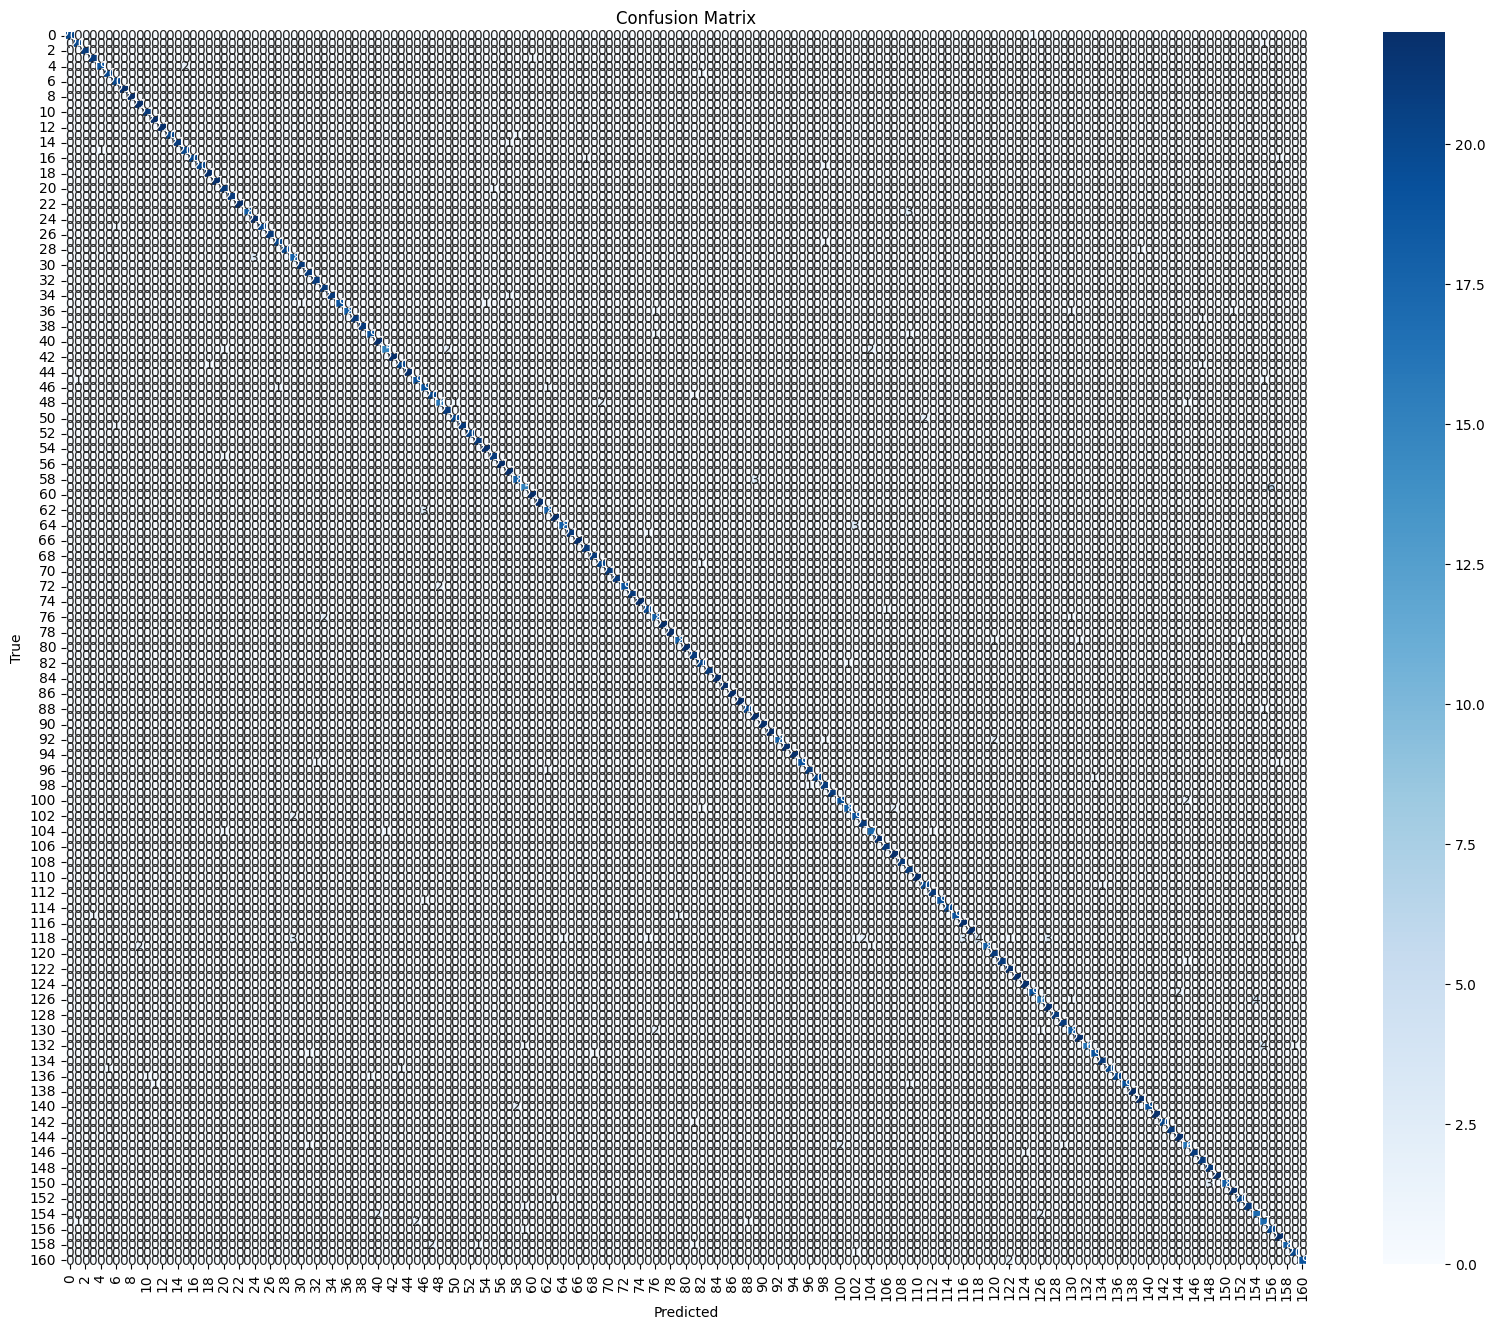


Classification Report:
                 precision    recall  f1-score   support

       Abundant       1.00      0.95      0.98        21
         Active       0.91      0.95      0.93        21
          Adult       1.00      1.00      1.00        21
          Agile       0.95      0.95      0.95        22
       Alluring       0.95      0.90      0.93        21
        Amiable       0.95      0.95      0.95        21
        Amusing       0.91      1.00      0.95        20
   Aristocratic       1.00      1.00      1.00        22
       Aromatic       1.00      1.00      1.00        22
       Artistic       0.92      1.00      0.96        22
  Authoritative       0.95      1.00      0.98        21
         Bitter       0.96      1.00      0.98        22
        Bitterl       1.00      1.00      1.00        22
           Bold       1.00      0.95      0.98        21
         Bright       1.00      0.95      0.98        22
      Brilliant       0.91      0.95      0.93        21
      

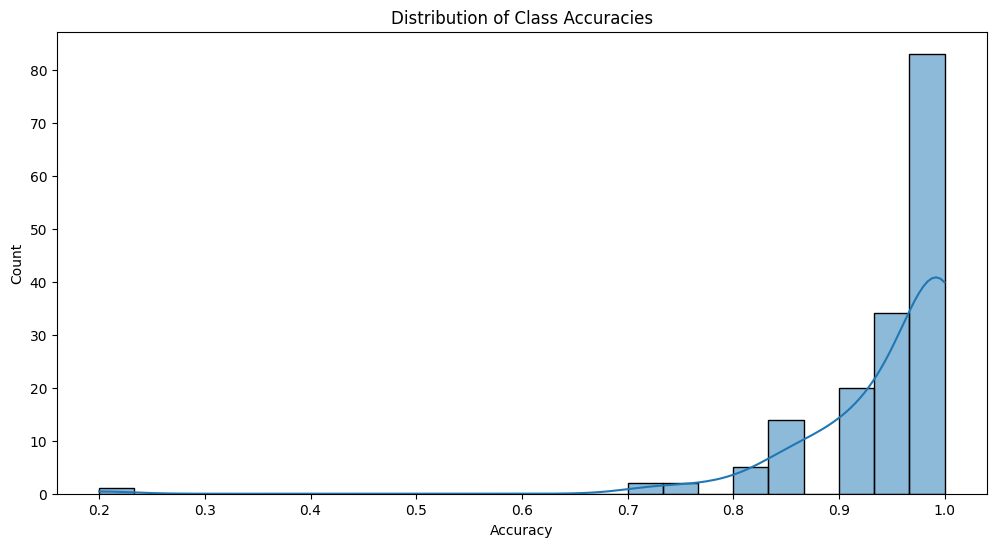


Worst performing classes:
Pure_Simplicity: 0.2000
Flamboyant: 0.7143
Showy: 0.7273
Distinguished: 0.7500
Robust: 0.7619

Best model architecture and hyperparameters have been saved to JSON files.


In [7]:
#1. Import necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import load_model
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0  # normalize the iutput features is crucial for neural networks as it ensures all features are on a similar scale and helps in faster convergence during training
y = data.iloc[:, -1].values

#2. Label encoding which is necessary because neural networks work with numerical data
le = LabelEncoder()
y = le.fit_transform(y) 

# Split the data
# "stratify" parameter ensures that the class distribution is maintained in both sets, addressing potential class imbalance issues
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#3. Compute class weights - useful for mainting model performance across all classes
# That way we give more importance to underrepresented classes during training, helping the model to learn all classes equally well, 
# which is crucial for achieving good performance across all classes in imbalanced datasets
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

#4. Architecture of MLP model
def build_model(hp):
    model = Sequential() # create a Sequential model
    model.add(Input(shape=(X.shape[1],))) # add Input layer with shape equal to the number of features - 9 in this case
    
    # Tune number of layers and units
    for i in range(hp.Int('num_layers', 2, 5)): # Determines the number of hidden layers in the model, between 2 and 5
        model.add(Dense(units=hp.Int(f'units_{i}', 32, 256, step=32), # add Dense layer with units between 32 and 256 in steps of 32
                        activation='relu', # add ReLU activation function
                        kernel_regularizer=l1_l2(l1=hp.Float(f'l1_{i}', 1e-6, 1e-2, sampling='log'),  # add L1 and L2 regularization with values between 1e-6 and 1e-2
                                                 l2=hp.Float(f'l2_{i}', 1e-6, 1e-2, sampling='log'))))
        model.add(BatchNormalization()) # add Batch Normalization layer to normalize the inputs of each layer for faster convergence
        model.add(Dropout(hp.Float(f'dropout_{i}', 0, 0.5, step=0.1))) # add Dropout layer with a rate between 0 and 0.5 , helping prevent overfitting
    
    model.add(Dense(len(np.unique(y)), activation='softmax')) # add the output layer with Softmax activation function for multi-class classification
    
    # Tune learning rate
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    optimizer = Adam(learning_rate=learning_rate)
    # Compiles the model with the chosen optimizer, loss function, and evaluation metric.
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#5. Define the hyperparameter search 
# Note that we are using RandomSearch here , inssead of GridSearch becausee we have a large hyperparameter space and it can find good hyperparameters in less time
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='emotion_classification'
)

#6. Decline Callbacks used to customize the trainig process 
# Prevents overfitting by stopping training when the validation loss stops improving. 
# "patience=20" - waits for 20 epochs of no improvement before stopping, "restore_best_weights=True" keeps the best model weights, not the last ones 
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# Reduces the learning rate when a metric has stopped improving. factor=0.2: Reduces the learning rate by 80% each time. 
# patience=10: Waits for 10 epochs of no improvement before reducing the learning rate.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

#7. Here we atually Perform the hyperparameter search
# the tuner tries different hyperparameters (from build_model function) and for each combination buidls a model and trains the model for maximum of 100 epocs
# 0.2 is used for validation during each trial , i apply these two callbacks in each trial  and i use class weights to handle class imbalances
tuner.search(X_train, y_train,
             epochs=100,
             validation_split=0.2,
             callbacks=[early_stopping, reduce_lr],
             class_weight=class_weight_dict)

#8. After the search is complete I retrieve the hyperparameters of the best-performing model from the searchh
# and i print each hyperparameter and its value
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
for hp, value in best_hps.values.items():
    print(f"{hp}: {value}")

#9. Here we build the model with the best hyperparameters and trains it using early stopping and learning rate reduction
best_model = tuner.hypermodel.build(best_hps)

# Print the model summary
print("\nBest Model Summary:")
best_model.summary()

# Train the best model - history captures the training process, including metrics for each epoch.
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

#10. Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print best accuracies
best_train_accuracy = max(history.history['accuracy'])
best_val_accuracy = max(history.history['val_accuracy'])
print(f"\nBest Training Accuracy: {best_train_accuracy:.4f}")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

#11. Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate F1-score is particularly useful for imbalanced datasets as it considers both precision and recall.
y_pred = best_model.predict(X_test).argmax(axis=1)
test_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Test F1-score: {test_f1:.4f}")

#12.Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#13. Additional Insights
print("\nAdditional Insights:")
print(f"Number of epochs trained: {len(history.history['accuracy'])}")
print(f"Final learning rate: {best_model.optimizer.learning_rate.numpy():.2e}")

# Check for overfitting/underfitting
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
acc_diff = train_acc - val_acc

if acc_diff > 0.05: # the value 0.05 or 5% is a commonly used heuristic in machine learning not universal!
    print("The model might be overfitting.")
elif acc_diff < -0.05:
    print("The model might be underfitting.")
else:
    print("The model seems to be well-balanced.")

# Plot accuracy distribution across classes
class_accuracies = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(12, 6))
sns.histplot(class_accuracies, kde=True)
plt.title('Distribution of Class Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.show()

#14. Identify worst-performing classes
worst_classes = np.argsort(class_accuracies)[:5]
print("\nWorst performing classes:")
for cls in worst_classes:
    print(f"{le.classes_[cls]}: {class_accuracies[cls]:.4f}")

#15. Save the best model architecture and hyperparameters for future use.
model_json = best_model.to_json()
with open("best_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

import json
with open("best_hyperparameters.json", "w") as f:
    json.dump(best_hps.values, f)

print("\nBest model architecture and hyperparameters have been saved to JSON files.")

### Analysis of Version Final:

1. Model Architecture: 3 hidden layers with neurons: 224 -> 160 -> 256 , Layer structure: Dense -> BatchNormalization -> Dropout (repeated for each layer)
2. Performance Metrics:

- Best Training Accuracy: 0.9342 (93.42%)
- Best Validation Accuracy: 0.9557 (95.57%)
- Test Accuracy: 0.9494 (94.94%)
- Test F1-score: 0.9479 (94.79%)Train Accuracy: Not directly reported

3. Hyperparameter Optimization:

- Used RandomizedSearchCV for efficient hyperparameter tuning
- Best learning rate: ReduceLROnPlateau or adaptive learning rate was tuned to 0.0006045397453672276
- Dropout is applied to some layers (0.2 for layers 1 and 2, 0.3 for layer 3)
- L1/L2 regularization: Varied for each layer (Elastic Net regularization)

4. Training Process:

- Used 5-fold cross-validation : 5-fold StratifiedKFold with RandomizedSearchCV
- Total training time: 2 hours 34 minutes
- Adaptive learning rate with initial value of ~0.0006, reduced during training
- Number of parameters: 123,393

5. Generalization: Excellent generalization evidenced by:

- Validation accuracy (95.57%) slightly higher than training accuracy (93.42%)
- Test accuracy (94.94%) very close to both training and validation accuracies
- Learning curves show steady improvement without plateauing, indicating good fit without overfitting

6. Bias-Variance Trade-off:

- Low bias: High training accuracy (93.42%) shows the model captures underlying patterns well
- Low variance: Close alignment of training, validation, and test accuracies indicates good generalization
- Bias estimate: 1 - Training Accuracy = 1 - 0.9342 = 0.0658 (6.58%) - Το μοντέλο μας έχει χαμηλό bias (περίπου 6.58%), που σημαίνει ότι μαθαίνει καλά τα μοτίβα των δεδομένων. Επιπλέον, γενικεύει καλά σε νέα δεδομένα, υποδεικνύοντας καλό έλεγχο του overfitting.

7. Class Performance:

- Majority of classes show high accuracy (>80%)
- Worst performing classes:
  - Pure_Simplicity: 20.00%
  - Flamboyant: 71.43%
  - Showy: 72.73%
  - Distinguished: 75.00%
  - Robust: 76.19%

* "Elastic Net regularization" - allows the model to benefit from both L1 and L2 regularization. The hyperparameter search is effectively testing different combinations of L1 and L2 strengths, including cases where one might be very small (effectively not used) and the other dominant.

- Also some more techniques used:
  - Early stopping
  - Class Imbalance : Class weights were used to handle imbalanced classe
